In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from collections import OrderedDict

In [2]:
mybl_lang = pd.read_csv('mybl_lang.csv')
mybl_lang = mybl_lang.loc[mybl_lang['name'] != 'Swift']
mybl_lang.drop('id', axis=1, inplace=True)

In [3]:
mybl_lang = mybl_lang.sort_values(by='date_added')

In [4]:
langs = mybl_lang.pivot(index='date_added', columns='name', values=['val', 'val_noexp', 'res_vac'])
langs.dropna(inplace=True)

In [5]:
Mind = pd.MultiIndex.from_tuples([('res', i) for i in langs['val'].columns])
langs_res = langs['res_vac'] * langs['val']
langs_res.columns = Mind
langs = pd.merge(langs, langs_res, how='left', on='date_added')
langs0 = langs.copy()

In [6]:
#normalization
for i in langs.columns:
    langs[i] = langs[i]/(max(langs[i]))

langs.describe()

val                                                        \
                1c         ABAP      Android Data scientist       DevOps   
count  1707.000000  1707.000000  1707.000000    1707.000000  1707.000000   
mean      0.747524     0.323615     0.437127       0.682136     0.596209   
std       0.123347     0.256160     0.247017       0.136665     0.139516   
min       0.442685     0.065000     0.126888       0.413926     0.308265   
25%       0.655251     0.145000     0.259819       0.572534     0.515637   
50%       0.733773     0.200000     0.356495       0.673114     0.580789   
75%       0.852379     0.385000     0.591843       0.794971     0.669955   
max       1.000000     1.000000     1.000000       1.000000     1.000000   

                                                                        ...  \
          Frontend       Golang         Java   Javascript       Python  ...   
count  1707.000000  1707.000000  1707.000000  1707.000000  1707.000000  ...   
mean      0.467828     0.702004     0.484490     0.477708     0.589994  ...   
std       0.230316     0.152794     0.216312     0.219051     0.150406  ...   
min       0.155628     0.378608     0.146936     0.212687     0.327453  ...   
25%       0.334191     0.587436     0.368658     0.337687     0.501721  ...   
50%       0.386614     0.691002     0.444762     0.388060     0.562392  ...   
75%       0.565879     0.833616     0.522293     0.570896     0.619836  ...   
max       1.000000     1.000000     1.000000     1.000000     1.000000  ...   

               res                                                      \
            Golang         Java   Javascript       Python         Ruby   
count  1707.000000  1707.000000  1707.000000  1707.000000  1707.000000   
mean      0.308472     0.617137     0.671938     0.541222     0.731350   
std       0.243519     0.191135     0.164896     0.228708     0.142790   
min       0.051132     0.339927     0.405064     0.191037     0.531921   
25%       0.103603     0.453058     0.542285     0.324725     0.591766   
50%       0.248963     0.588411     0.651975     0.537426     0.711060   
75%       0.417644     0.756454     0.803634     0.710773     0.849418   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

                                                                        
             Scala          cpp           cs          iOS          php  
count  1707.000000  1707.000000  1707.000000  1707.000000  1707.000000  
mean      0.705252     0.640492     0.630136     0.678469     0.682981  
std       0.170057     0.186271     0.161456     0.198297     0.153582  
min       0.422535     0.380192     0.387407     0.353603     0.484897  
25%       0.590669     0.473058     0.486987     0.497447     0.558159  
50%       0.680843     0.598830     0.614435     0.697977     0.628488  
75%       0.834434     0.797289     0.732717     0.848988     0.806418  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 64 columns]

([<matplotlib.axis.XTick at 0x218b25ae990>,
 [Text(281.0, 0, '2022-01-01'), Text(646.0, 0, '2023-01-01')])

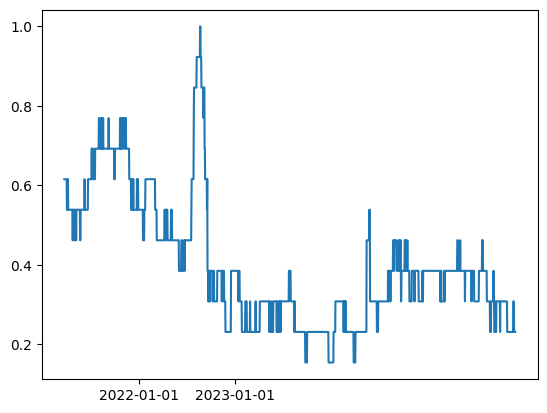

In [7]:
plt.plot(langs["val_noexp", "cpp"])
plt.xticks(['2022-01-01', '2023-01-01'])

In [8]:
def derivative(column, window):
    colmns = langs[column].columns

    langs1 = langs[column].copy()
    langs2 = langs[column].copy()

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels_val = OrderedDict()

    for c in colmns:
        langs1[c] = langs1[c].rolling(window=window).mean()
        langs2[c] = langs2[c].rolling(window=window).mean()
        langs2[c] = langs2[c].shift(window)
        labels_val[c] = (langs1[c] - langs2[c])[-1]

    labels = [k for k, v in sorted(labels_val.items(), key=lambda item: item[1], reverse=True)]

    for i, l in enumerate(labels):   
        if i < 10:
            ax.plot(langs1[l] - langs2[l])
        else:
            ax.plot(langs1[l] - langs2[l], linestyle='--')

    ax.legend(labels, loc='upper left')
    ax.axhline(y=0, color='k')
    plt.xticks('')
    #colmns = langs1.iloc[0].sort_values(ascending=False).index

C:\Users\ksn\AppData\Local\Temp\ipykernel_20364\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


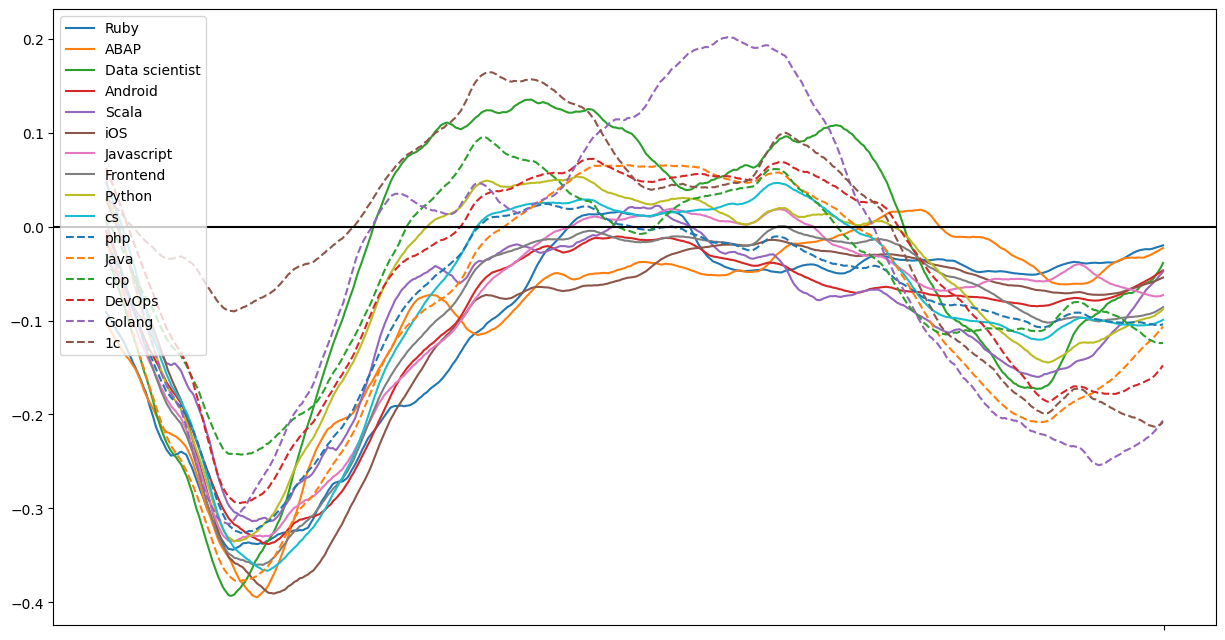

In [9]:
derivative('val', 200)

C:\Users\ksn\AppData\Local\Temp\ipykernel_20364\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


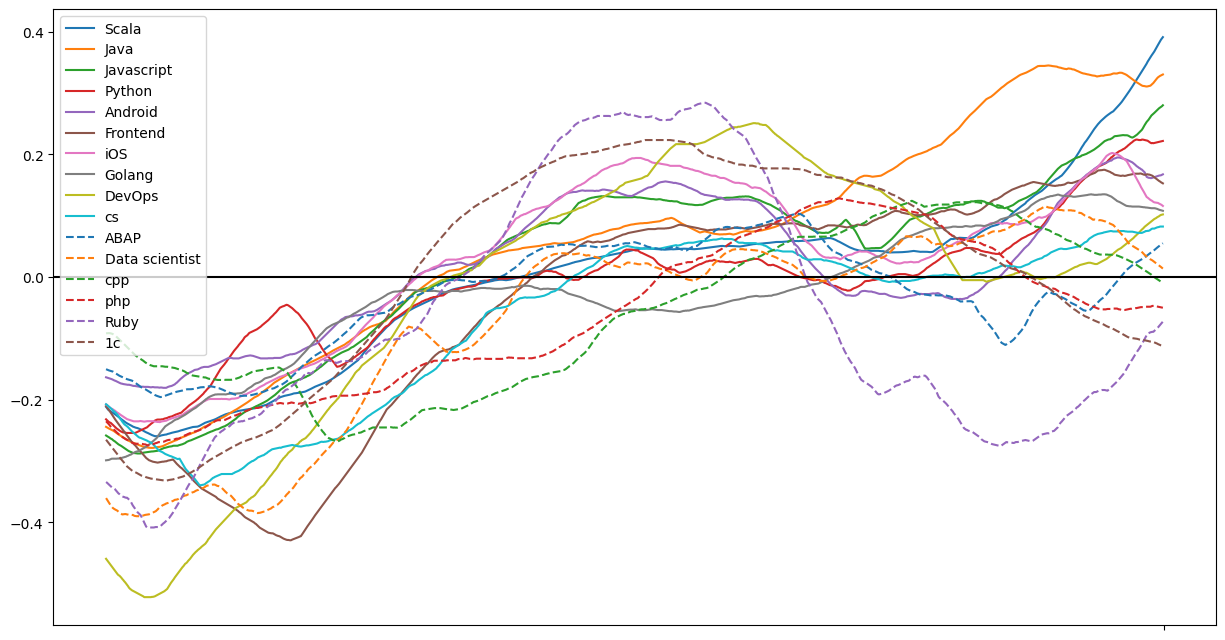

In [10]:
derivative('val_noexp', 300)

C:\Users\ksn\AppData\Local\Temp\ipykernel_20364\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


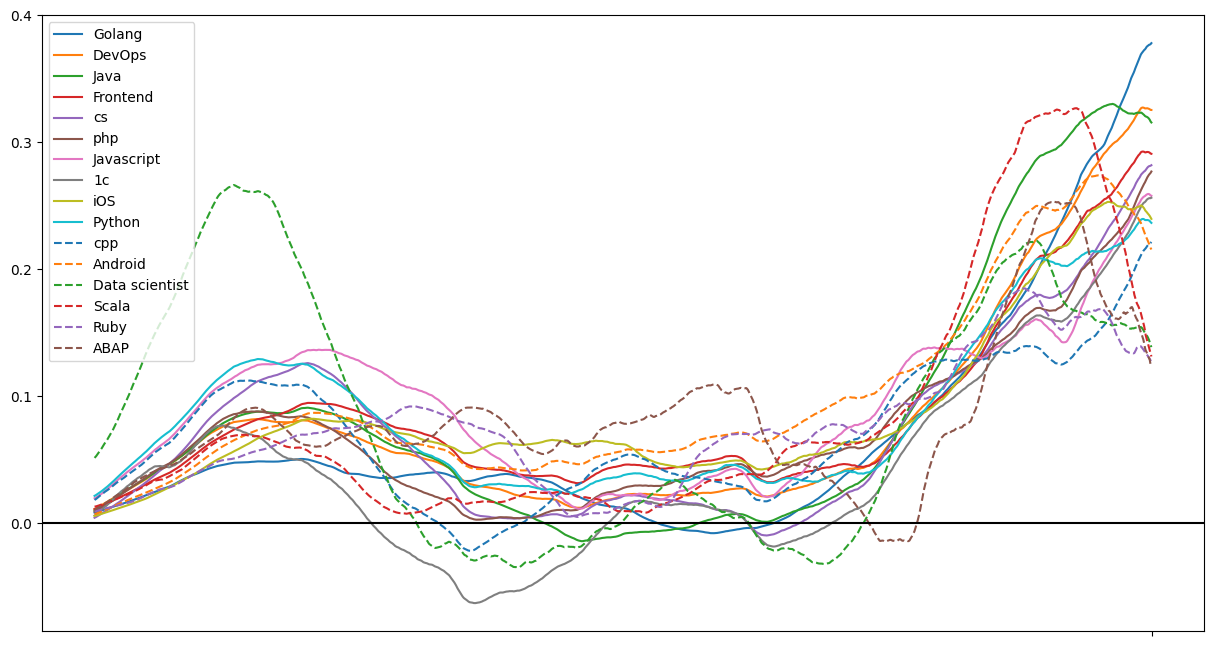

In [11]:
derivative('res_vac', 200)

C:\Users\ksn\AppData\Local\Temp\ipykernel_20364\1167768440.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  labels_val[c] = (langs1[c] - langs2[c])[-1]


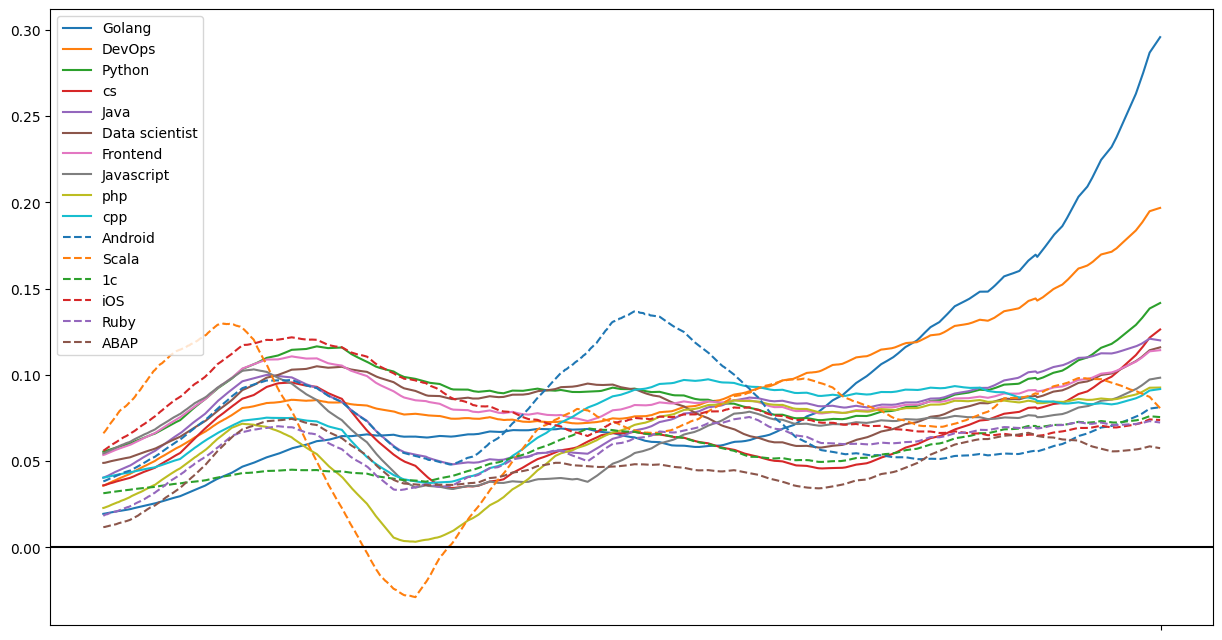

In [12]:
derivative('res', 200)

In [13]:
import seaborn as sns

def corr_matrix(colmns):
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1.0)
    sns.heatmap(pd.DataFrame(langs[colmns]).corr(),cmap='GnBu',annot=True)

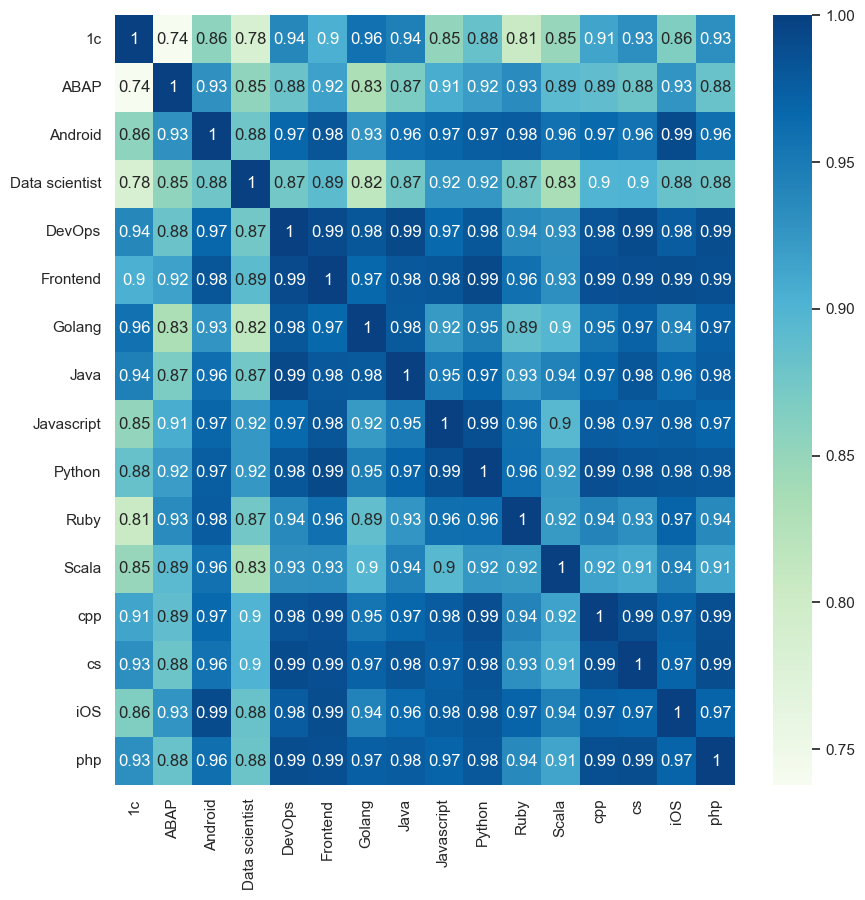

In [14]:
corr_matrix('res_vac')

In [15]:
langs.index = pd.to_datetime(langs.index)

def year(x):
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 4)
    plt.plot(langs[x].groupby(langs.index.strftime('%m-%d')).median().median(axis=1))
    plt.xticks([str(i).zfill(2) + "-01" for i in range(1, 13)])
    plt.grid()

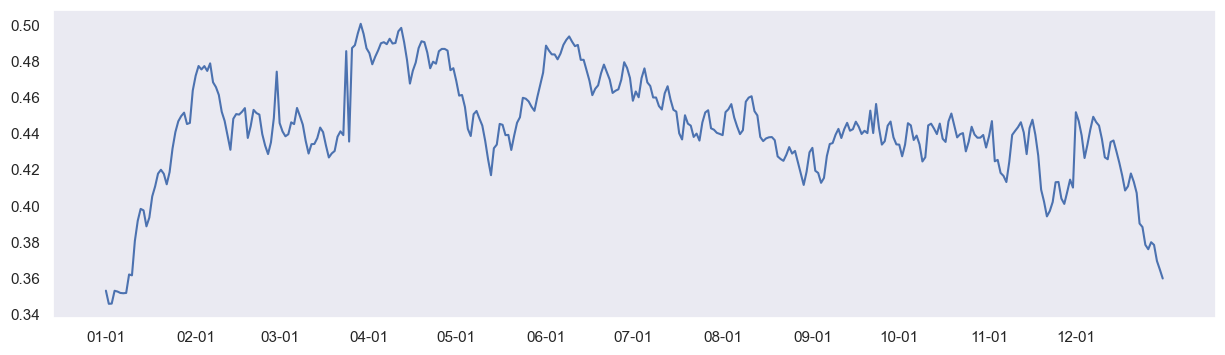

In [16]:
year("val")

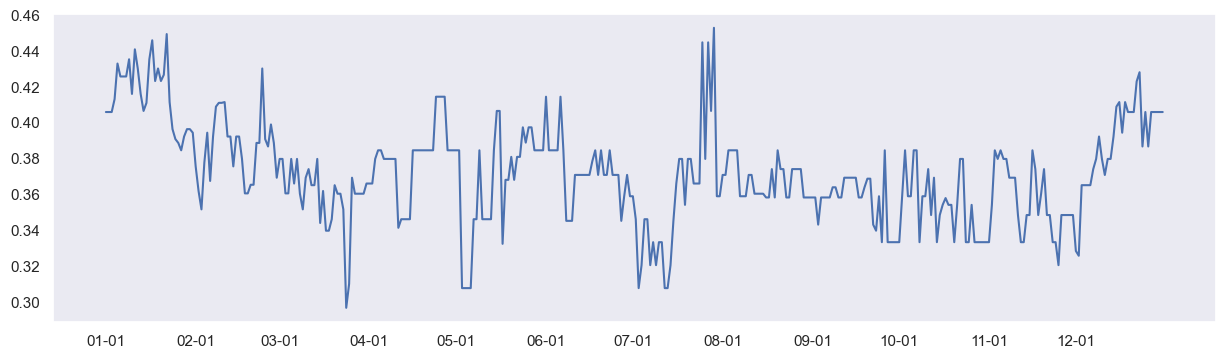

In [17]:
year("val_noexp")

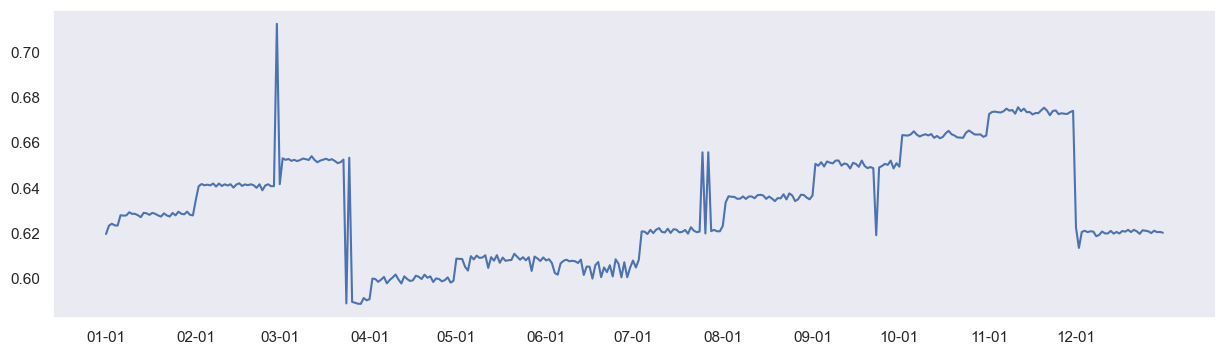

In [18]:
year("res")

In [19]:
def normalize(column, window):
    langs1 = langs[column].copy()
    colmns = langs1.iloc[0].sort_values(ascending=False).index

    fig, ax = plt.subplots()
    fig.set_size_inches(15, 8)
    labels = []

    for i, c in enumerate(colmns):
        langs1[c] = langs1[c].rolling(window=window).mean()

        if i < 10:
            ax.plot(langs1[c])
            labels.append(langs1[c].name)
        else:
            ax.plot(langs1[c], linestyle='--')
            labels.append(langs1[c].name)

    ax.legend(labels)

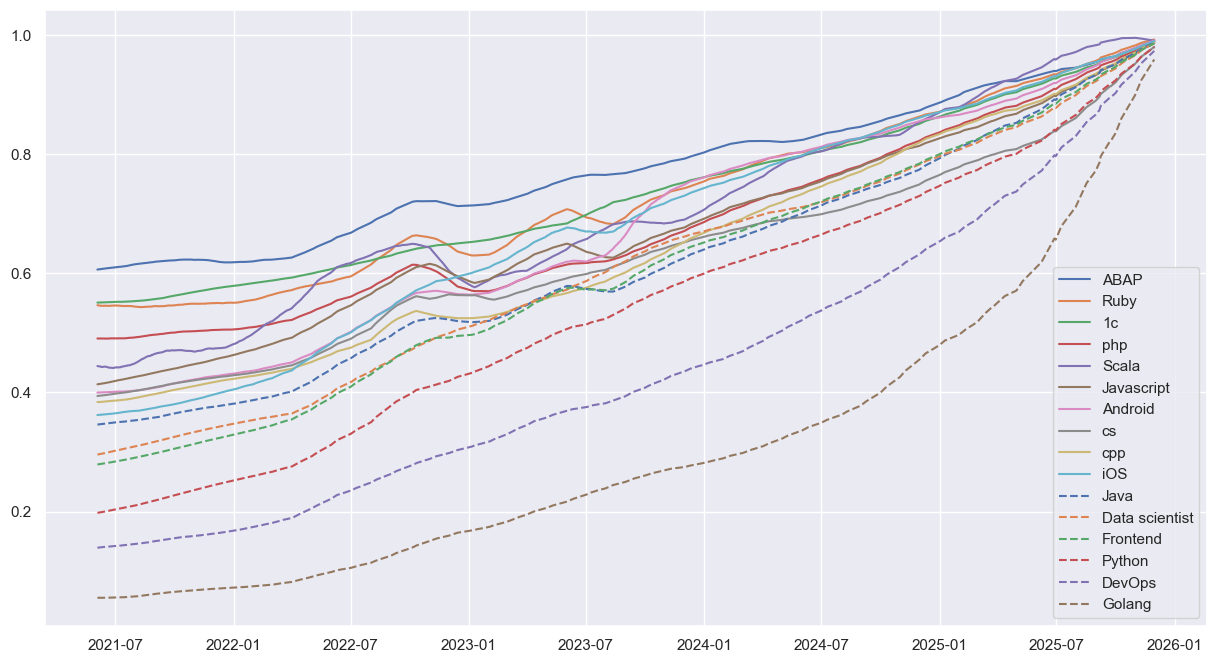

In [20]:
normalize("res", 70)

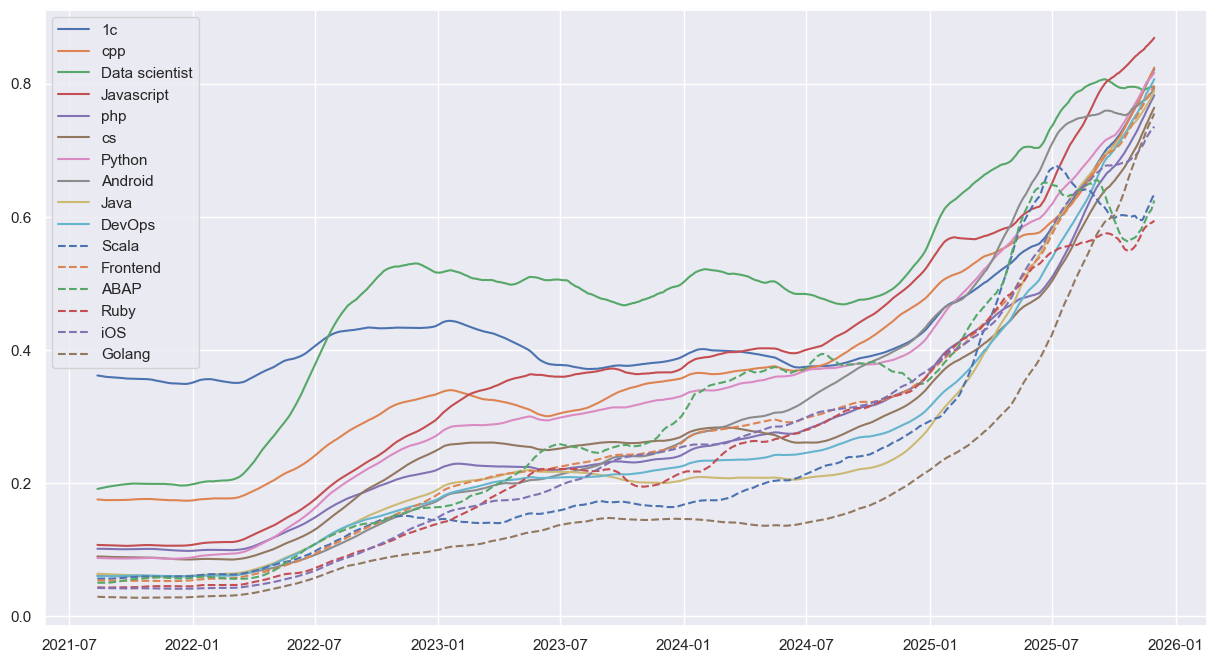

In [21]:
normalize("res_vac", 140)

In [22]:
langs.res.loc['2021-03']

,1c,ABAP,Android,Data scientist,DevOps,Frontend,Golang,Java,Javascript,Python,Ruby,Scala,cpp,cs,iOS,php
date_added,,,,,,,,,,,,,,,,
2021-03-26,0.549527,0.594923,0.394692,0.289608,0.137397,0.273305,0.055823,0.344494,0.406481,0.191634,0.552307,0.454886,0.383733,0.390936,0.353603,0.491249
2021-03-27,0.548980,0.607064,0.398783,0.289359,0.135546,0.274761,0.054743,0.340545,0.410408,0.191037,0.552307,0.449164,0.383095,0.389307,0.361156,0.488333
2021-03-28,0.547617,0.604489,0.399997,0.290215,0.132323,0.274046,0.053972,0.342101,0.411878,0.191997,0.559159,0.443442,0.380262,0.391048,0.356069,0.490196
2021-03-29,0.550348,0.603974,0.397821,0.289197,0.137607,0.272358,0.055677,0.339927,0.405703,0.192444,0.548196,0.446303,0.381704,0.390911,0.358015,0.487397
2021-03-30,0.549898,0.607064,0.401660,0.289403,0.132940,0.273833,0.053761,0.343205,0.406786,0.192077,0.546996,0.460607,0.382518,0.389933,0.354162,0.487737
2021-03-31,0.551512,0.598528,0.395964,0.290264,0.135340,0.275190,0.053761,0.341631,0.406009,0.191634,0.550537,0.469190,0.381990,0.388221,0.363064,0.488478


In [23]:
langs0.index = pd.to_datetime(langs0.index)
res = pd.DataFrame(columns=langs0.res.loc['2021-03'].columns)

In [24]:
for i in sorted(set(langs0.res.index.strftime('%Y-%m'))):
    res.loc[i] = langs0.res.loc[i].mean()

In [25]:
langs0.res.loc['2021-03'].columns

Index(['1c', 'ABAP', 'Android', 'Data scientist', 'DevOps', 'Frontend',
       'Golang', 'Java', 'Javascript', 'Python', 'Ruby', 'Scala', 'cpp', 'cs',
       'iOS', 'php'],
      dtype='object')